In [191]:
from settings import Settings
from utils.datasets import MaestroDataset
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.nn.init
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim
import matplotlib.pyplot as plt

In [192]:
settings = Settings() # Set Extra Settings in settings.py

In [193]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cpu


In [194]:
dataset = MaestroDataset("train", settings=settings)

In [195]:
print('total number : {}'.format(len(dataset)))

total number : 144910


In [196]:
class lstm_Model(nn.Module):
    def __init__(self):
        super(lstm_Model, self).__init__()

        self.conv_layer = nn.Sequential(
            
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3),
            nn.ReLU(),            
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
            nn.ReLU(),            
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3),
            nn.ReLU()        
            
        )
        self.lstm_layer = nn.LSTM(1*256*2*10, 128)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.conv_layer(x)
        out, (_, _) = self.lstm_layer(out.view(out.size(0), 1, -1))
        out = self.sigmoid(out)

        return out

    def loss(self, output, target):
        loss = nn.MSELoss(output.view(1, -1), target)

        return loss

In [197]:
model = lstm_Model().to(device)
model(torch.Tensor(dataset[1][0][:settings.n_of_cnn_frames]).view(1,1,-1,128)).shape

torch.Size([1, 1, 128])

1 ,  0  LOSS:  0.24985845386981964
1 ,  1  LOSS:  0.24985279142856598
1 ,  2  LOSS:  0.2498457282781601
1 ,  3  LOSS:  0.24984079599380493
1 ,  4  LOSS:  0.2498333901166916
1 ,  5  LOSS:  0.24982771277427673
1 ,  6  LOSS:  0.2498212307691574
1 ,  7  LOSS:  0.24981576204299927
1 ,  8  LOSS:  0.24981145560741425
1 ,  9  LOSS:  0.24980634450912476
1 ,  10  LOSS:  0.24980111420154572
1 ,  11  LOSS:  0.24979448318481445
1 ,  12  LOSS:  0.24978862702846527
1 ,  13  LOSS:  0.24978192150592804
1 ,  14  LOSS:  0.24977602064609528
1 ,  15  LOSS:  0.24976906180381775
1 ,  16  LOSS:  0.2497645914554596
1 ,  17  LOSS:  0.24975894391536713
1 ,  18  LOSS:  0.24975210428237915
1 ,  19  LOSS:  0.2497445046901703
1 ,  20  LOSS:  0.24973775446414948
1 ,  21  LOSS:  0.24973227083683014
1 ,  22  LOSS:  0.24972482025623322
1 ,  23  LOSS:  0.24972042441368103
1 ,  24  LOSS:  0.24971219897270203
1 ,  25  LOSS:  0.24970631301403046
1 ,  26  LOSS:  0.2496996372938156
1 ,  27  LOSS:  0.24969348311424255
1 ,  28 

2 ,  101  LOSS:  0.2483147531747818
2 ,  102  LOSS:  0.24831444025039673
2 ,  103  LOSS:  0.24830980598926544
2 ,  104  LOSS:  0.24830283224582672
2 ,  105  LOSS:  0.24829846620559692
2 ,  106  LOSS:  0.24829670786857605
2 ,  107  LOSS:  0.2482908070087433
2 ,  108  LOSS:  0.24828635156154633
2 ,  109  LOSS:  0.2482823133468628
2 ,  110  LOSS:  0.2482774257659912
2 ,  111  LOSS:  0.24827241897583008
2 ,  112  LOSS:  0.24826756119728088
2 ,  113  LOSS:  0.2482612133026123
2 ,  114  LOSS:  0.2482578009366989
2 ,  115  LOSS:  0.24825097620487213
2 ,  116  LOSS:  0.24824443459510803
2 ,  117  LOSS:  0.24823690950870514
2 ,  118  LOSS:  0.24823097884655
2 ,  119  LOSS:  0.24822527170181274
2 ,  120  LOSS:  0.24822011590003967
2 ,  121  LOSS:  0.24821335077285767
2 ,  122  LOSS:  0.2482067346572876
2 ,  123  LOSS:  0.24820049107074738
2 ,  124  LOSS:  0.24819403886795044
2 ,  125  LOSS:  0.24818745255470276
2 ,  126  LOSS:  0.24818100035190582
2 ,  127  LOSS:  0.24817441403865814
Data:3 cost

4 ,  75  LOSS:  0.24680374562740326
4 ,  76  LOSS:  0.24679583311080933
4 ,  77  LOSS:  0.24678955972194672
4 ,  78  LOSS:  0.24678140878677368
4 ,  79  LOSS:  0.24677270650863647
4 ,  80  LOSS:  0.24676404893398285
4 ,  81  LOSS:  0.24675340950489044
4 ,  82  LOSS:  0.24674682319164276
4 ,  83  LOSS:  0.24674281477928162
4 ,  84  LOSS:  0.2467329353094101
4 ,  85  LOSS:  0.24672497808933258
4 ,  86  LOSS:  0.24671705067157745
4 ,  87  LOSS:  0.24671050906181335
4 ,  88  LOSS:  0.24670246243476868
4 ,  89  LOSS:  0.2466970831155777
4 ,  90  LOSS:  0.2466907799243927
4 ,  91  LOSS:  0.24668267369270325
4 ,  92  LOSS:  0.24667860567569733
4 ,  93  LOSS:  0.24667373299598694
4 ,  94  LOSS:  0.2466680258512497
4 ,  95  LOSS:  0.24666088819503784
4 ,  96  LOSS:  0.24665488302707672
4 ,  97  LOSS:  0.24664907157421112
4 ,  98  LOSS:  0.24664850533008575
4 ,  99  LOSS:  0.24664296209812164
4 ,  100  LOSS:  0.24663814902305603
4 ,  101  LOSS:  0.2466331273317337
4 ,  102  LOSS:  0.246629148721

6 ,  47  LOSS:  0.24405507743358612
6 ,  48  LOSS:  0.2440440058708191
6 ,  49  LOSS:  0.2440328747034073
6 ,  50  LOSS:  0.2440163493156433
6 ,  51  LOSS:  0.24400928616523743
6 ,  52  LOSS:  0.24399469792842865
6 ,  53  LOSS:  0.24398045241832733
6 ,  54  LOSS:  0.24396266043186188
6 ,  55  LOSS:  0.24395346641540527
6 ,  56  LOSS:  0.24393796920776367
6 ,  57  LOSS:  0.24392648041248322
6 ,  58  LOSS:  0.24390992522239685
6 ,  59  LOSS:  0.2438979297876358
6 ,  60  LOSS:  0.243882417678833
6 ,  61  LOSS:  0.2438693791627884
6 ,  62  LOSS:  0.24385175108909607
6 ,  63  LOSS:  0.24384267628192902
6 ,  64  LOSS:  0.24382449686527252
6 ,  65  LOSS:  0.24381615221500397
6 ,  66  LOSS:  0.24379436671733856
6 ,  67  LOSS:  0.2437841296195984
6 ,  68  LOSS:  0.2437649816274643
6 ,  69  LOSS:  0.24375160038471222
6 ,  70  LOSS:  0.24372828006744385
6 ,  71  LOSS:  0.2437129020690918
6 ,  72  LOSS:  0.2437005490064621
6 ,  73  LOSS:  0.24369008839130402
6 ,  74  LOSS:  0.24367539584636688
6 ,

8 ,  20  LOSS:  0.24051693081855774
8 ,  21  LOSS:  0.24049703776836395
8 ,  22  LOSS:  0.2404794692993164
8 ,  23  LOSS:  0.24045716226100922
8 ,  24  LOSS:  0.24043452739715576
8 ,  25  LOSS:  0.24040912091732025
8 ,  26  LOSS:  0.24038715660572052
8 ,  27  LOSS:  0.24036312103271484
8 ,  28  LOSS:  0.240340456366539
8 ,  29  LOSS:  0.24031893908977509
8 ,  30  LOSS:  0.24029897153377533
8 ,  31  LOSS:  0.24027374386787415
8 ,  32  LOSS:  0.24024641513824463
8 ,  33  LOSS:  0.24022620916366577
8 ,  34  LOSS:  0.24019969999790192
8 ,  35  LOSS:  0.24017246067523956
8 ,  36  LOSS:  0.24014589190483093
8 ,  37  LOSS:  0.2401265650987625
8 ,  38  LOSS:  0.24010558426380157
8 ,  39  LOSS:  0.2400788515806198
8 ,  40  LOSS:  0.24005244672298431
8 ,  41  LOSS:  0.2400316447019577
8 ,  42  LOSS:  0.24000689387321472
8 ,  43  LOSS:  0.2399841547012329
8 ,  44  LOSS:  0.23996415734291077
8 ,  45  LOSS:  0.23994143307209015
8 ,  46  LOSS:  0.2399219274520874
8 ,  47  LOSS:  0.2398998737335205
8

9 ,  120  LOSS:  0.23419737815856934
9 ,  121  LOSS:  0.2341591715812683
9 ,  122  LOSS:  0.2341255247592926
9 ,  123  LOSS:  0.2340886890888214
9 ,  124  LOSS:  0.23405282199382782
9 ,  125  LOSS:  0.23401357233524323
9 ,  126  LOSS:  0.23397421836853027
9 ,  127  LOSS:  0.2339344173669815
Data:10 cost=0.2357194285141304
10 ,  0  LOSS:  0.23216108977794647
10 ,  1  LOSS:  0.23212233185768127
10 ,  2  LOSS:  0.23204980790615082
10 ,  3  LOSS:  0.2320164144039154
10 ,  4  LOSS:  0.231940358877182
10 ,  5  LOSS:  0.2318926900625229
10 ,  6  LOSS:  0.23181068897247314
10 ,  7  LOSS:  0.23177263140678406
10 ,  8  LOSS:  0.2317010760307312
10 ,  9  LOSS:  0.23165470361709595
10 ,  10  LOSS:  0.23158420622348785
10 ,  11  LOSS:  0.23155628144741058
10 ,  12  LOSS:  0.23150961101055145
10 ,  13  LOSS:  0.2314705103635788
10 ,  14  LOSS:  0.23142123222351074
10 ,  15  LOSS:  0.23138058185577393
10 ,  16  LOSS:  0.23134587705135345
10 ,  17  LOSS:  0.2313106209039688
10 ,  18  LOSS:  0.23127748

11 ,  86  LOSS:  0.21731878817081451
11 ,  87  LOSS:  0.21724173426628113
11 ,  88  LOSS:  0.21716725826263428
11 ,  89  LOSS:  0.21707670390605927
11 ,  90  LOSS:  0.2170451432466507
11 ,  91  LOSS:  0.2169618457555771
11 ,  92  LOSS:  0.2169584333896637
11 ,  93  LOSS:  0.21686537563800812
11 ,  94  LOSS:  0.21688446402549744
11 ,  95  LOSS:  0.21679356694221497
11 ,  96  LOSS:  0.21682830154895782
11 ,  97  LOSS:  0.21674774587154388
11 ,  98  LOSS:  0.2168172001838684
11 ,  99  LOSS:  0.21676914393901825
11 ,  100  LOSS:  0.21687836945056915
11 ,  101  LOSS:  0.21681994199752808
11 ,  102  LOSS:  0.21691857278347015
11 ,  103  LOSS:  0.2168743908405304
11 ,  104  LOSS:  0.2169748991727829
11 ,  105  LOSS:  0.21693068742752075
11 ,  106  LOSS:  0.21701399981975555
11 ,  107  LOSS:  0.21699796617031097
11 ,  108  LOSS:  0.21709491312503815
11 ,  109  LOSS:  0.217058464884758
11 ,  110  LOSS:  0.217121884226799
11 ,  111  LOSS:  0.21708720922470093
11 ,  112  LOSS:  0.2171381860971450

13 ,  53  LOSS:  0.19005568325519562
13 ,  54  LOSS:  0.18977683782577515
13 ,  55  LOSS:  0.18966397643089294
13 ,  56  LOSS:  0.18942037224769592
13 ,  57  LOSS:  0.18928678333759308
13 ,  58  LOSS:  0.1890387237071991
13 ,  59  LOSS:  0.18891005218029022
13 ,  60  LOSS:  0.18869192898273468
13 ,  61  LOSS:  0.18854118883609772
13 ,  62  LOSS:  0.18834611773490906
13 ,  63  LOSS:  0.18821236491203308
13 ,  64  LOSS:  0.18804551661014557
13 ,  65  LOSS:  0.18788424134254456
13 ,  66  LOSS:  0.18772944808006287
13 ,  67  LOSS:  0.18758083879947662
13 ,  68  LOSS:  0.18745598196983337
13 ,  69  LOSS:  0.18729235231876373
13 ,  70  LOSS:  0.18718920648097992
13 ,  71  LOSS:  0.1870453655719757
13 ,  72  LOSS:  0.18696579337120056
13 ,  73  LOSS:  0.18679466843605042
13 ,  74  LOSS:  0.18673542141914368
13 ,  75  LOSS:  0.18659096956253052
13 ,  76  LOSS:  0.18655157089233398
13 ,  77  LOSS:  0.18638905882835388
13 ,  78  LOSS:  0.18636004626750946
13 ,  79  LOSS:  0.18623486161231995
13 

15 ,  20  LOSS:  0.15704520046710968
15 ,  21  LOSS:  0.15682795643806458
15 ,  22  LOSS:  0.15663789212703705
15 ,  23  LOSS:  0.1564512699842453
15 ,  24  LOSS:  0.15631429851055145
15 ,  25  LOSS:  0.156092569231987
15 ,  26  LOSS:  0.1559559404850006
15 ,  27  LOSS:  0.15575453639030457
15 ,  28  LOSS:  0.15564776957035065
15 ,  29  LOSS:  0.15542571246623993
15 ,  30  LOSS:  0.15531481802463531
15 ,  31  LOSS:  0.15510381758213043
15 ,  32  LOSS:  0.15503518283367157
15 ,  33  LOSS:  0.1548180729150772
15 ,  34  LOSS:  0.15474769473075867
15 ,  35  LOSS:  0.1545250564813614
15 ,  36  LOSS:  0.15446686744689941
15 ,  37  LOSS:  0.154236301779747
15 ,  38  LOSS:  0.15418881177902222
15 ,  39  LOSS:  0.15394917130470276
15 ,  40  LOSS:  0.15391990542411804
15 ,  41  LOSS:  0.15368008613586426
15 ,  42  LOSS:  0.15366214513778687
15 ,  43  LOSS:  0.15342018008232117
15 ,  44  LOSS:  0.15337541699409485
15 ,  45  LOSS:  0.15313442051410675
15 ,  46  LOSS:  0.15310721099376678
15 ,  47 

16 ,  117  LOSS:  0.13957248628139496
16 ,  118  LOSS:  0.13962708413600922
16 ,  119  LOSS:  0.13960511982440948
16 ,  120  LOSS:  0.13962355256080627
16 ,  121  LOSS:  0.13956241309642792
16 ,  122  LOSS:  0.13953089714050293
16 ,  123  LOSS:  0.13946615159511566
16 ,  124  LOSS:  0.13941264152526855
16 ,  125  LOSS:  0.1393289715051651
16 ,  126  LOSS:  0.1392499804496765
16 ,  127  LOSS:  0.1391652673482895
Data:17 cost=0.13816393294837326
17 ,  0  LOSS:  0.1322476863861084
17 ,  1  LOSS:  0.13213080167770386
17 ,  2  LOSS:  0.1319769322872162
17 ,  3  LOSS:  0.13184694945812225
17 ,  4  LOSS:  0.1316949725151062
17 ,  5  LOSS:  0.13155442476272583
17 ,  6  LOSS:  0.13139916956424713
17 ,  7  LOSS:  0.1312539130449295
17 ,  8  LOSS:  0.1311010867357254
17 ,  9  LOSS:  0.13094650208950043
17 ,  10  LOSS:  0.1308121532201767
17 ,  11  LOSS:  0.1306591033935547
17 ,  12  LOSS:  0.1305442601442337
17 ,  13  LOSS:  0.13038484752178192
17 ,  14  LOSS:  0.13028623163700104
17 ,  15  LOSS:

18 ,  86  LOSS:  0.12030430138111115
18 ,  87  LOSS:  0.12038213014602661
18 ,  88  LOSS:  0.1203833669424057
18 ,  89  LOSS:  0.12049616873264313
18 ,  90  LOSS:  0.1205277293920517
18 ,  91  LOSS:  0.12066322565078735
18 ,  92  LOSS:  0.12073889374732971
18 ,  93  LOSS:  0.12089179456233978
18 ,  94  LOSS:  0.12096954882144928
18 ,  95  LOSS:  0.1211371198296547
18 ,  96  LOSS:  0.12126269936561584
18 ,  97  LOSS:  0.12145227938890457
18 ,  98  LOSS:  0.1215987280011177
18 ,  99  LOSS:  0.12179049849510193
18 ,  100  LOSS:  0.1219787448644638
18 ,  101  LOSS:  0.12215456366539001
18 ,  102  LOSS:  0.12231629341840744
18 ,  103  LOSS:  0.1224752813577652
18 ,  104  LOSS:  0.12265615165233612
18 ,  105  LOSS:  0.12280578911304474
18 ,  106  LOSS:  0.12296933680772781
18 ,  107  LOSS:  0.12309455871582031
18 ,  108  LOSS:  0.1232633963227272
18 ,  109  LOSS:  0.12335322797298431
18 ,  110  LOSS:  0.12347457557916641
18 ,  111  LOSS:  0.1235349103808403
18 ,  112  LOSS:  0.12363824993371

20 ,  51  LOSS:  0.11328727751970291
20 ,  52  LOSS:  0.11329228430986404
20 ,  53  LOSS:  0.11324260383844376
20 ,  54  LOSS:  0.11324584484100342
20 ,  55  LOSS:  0.11318184435367584
20 ,  56  LOSS:  0.11320067197084427
20 ,  57  LOSS:  0.11314936727285385
20 ,  58  LOSS:  0.11317319422960281
20 ,  59  LOSS:  0.11310555040836334
20 ,  60  LOSS:  0.11315040290355682
20 ,  61  LOSS:  0.11310125887393951
20 ,  62  LOSS:  0.11315102130174637
20 ,  63  LOSS:  0.11308597028255463
20 ,  64  LOSS:  0.11314789950847626
20 ,  65  LOSS:  0.11310746520757675
20 ,  66  LOSS:  0.11317940056324005
20 ,  67  LOSS:  0.11311958730220795
20 ,  68  LOSS:  0.11319420486688614
20 ,  69  LOSS:  0.11315470188856125
20 ,  70  LOSS:  0.11323292553424835
20 ,  71  LOSS:  0.11317795515060425
20 ,  72  LOSS:  0.1132475808262825
20 ,  73  LOSS:  0.11321365088224411
20 ,  74  LOSS:  0.11328835040330887
20 ,  75  LOSS:  0.11324173212051392
20 ,  76  LOSS:  0.11330109089612961
20 ,  77  LOSS:  0.11326489597558975
20

22 ,  18  LOSS:  0.10992637276649475
22 ,  19  LOSS:  0.10990134626626968
22 ,  20  LOSS:  0.1098836287856102
22 ,  21  LOSS:  0.10986293852329254
22 ,  22  LOSS:  0.1098412349820137
22 ,  23  LOSS:  0.1098203957080841
22 ,  24  LOSS:  0.10979526489973068
22 ,  25  LOSS:  0.10977590829133987
22 ,  26  LOSS:  0.10974542051553726
22 ,  27  LOSS:  0.10972478240728378
22 ,  28  LOSS:  0.10969176888465881
22 ,  29  LOSS:  0.1096736341714859
22 ,  30  LOSS:  0.10963547974824905
22 ,  31  LOSS:  0.10961806029081345
22 ,  32  LOSS:  0.10957957804203033
22 ,  33  LOSS:  0.10956557840108871
22 ,  34  LOSS:  0.10952530056238174
22 ,  35  LOSS:  0.10951101034879684
22 ,  36  LOSS:  0.10947298258543015
22 ,  37  LOSS:  0.10946105420589447
22 ,  38  LOSS:  0.10942355543375015
22 ,  39  LOSS:  0.10941394418478012
22 ,  40  LOSS:  0.10937778651714325
22 ,  41  LOSS:  0.10936972498893738
22 ,  42  LOSS:  0.10933687537908554
22 ,  43  LOSS:  0.10933016240596771
22 ,  44  LOSS:  0.10930135101079941
22 , 

23 ,  115  LOSS:  0.10892263054847717
23 ,  116  LOSS:  0.10897690802812576
23 ,  117  LOSS:  0.10898194462060928
23 ,  118  LOSS:  0.10901091247797012
23 ,  119  LOSS:  0.10901547968387604
23 ,  120  LOSS:  0.10903584957122803
23 ,  121  LOSS:  0.1090317890048027
23 ,  122  LOSS:  0.1090356856584549
23 ,  123  LOSS:  0.1090300977230072
23 ,  124  LOSS:  0.10902853310108185
23 ,  125  LOSS:  0.10901808738708496
23 ,  126  LOSS:  0.10900870710611343
23 ,  127  LOSS:  0.10899743437767029
Data:24 cost=0.10770015750313178
24 ,  0  LOSS:  0.10674090683460236
24 ,  1  LOSS:  0.10674525797367096
24 ,  2  LOSS:  0.10671410709619522
24 ,  3  LOSS:  0.10671909153461456
24 ,  4  LOSS:  0.10668312758207321
24 ,  5  LOSS:  0.10669203847646713
24 ,  6  LOSS:  0.10666050016880035
24 ,  7  LOSS:  0.10667363554239273
24 ,  8  LOSS:  0.10663903504610062
24 ,  9  LOSS:  0.10665593296289444
24 ,  10  LOSS:  0.10662848502397537
24 ,  11  LOSS:  0.10664968937635422
24 ,  12  LOSS:  0.10661960393190384
24 , 

25 ,  84  LOSS:  0.10608731210231781
25 ,  85  LOSS:  0.10611437261104584
25 ,  86  LOSS:  0.10613612830638885
25 ,  87  LOSS:  0.10616453737020493
25 ,  88  LOSS:  0.10618263483047485
25 ,  89  LOSS:  0.10620049387216568
25 ,  90  LOSS:  0.10623181611299515
25 ,  91  LOSS:  0.10625382512807846
25 ,  92  LOSS:  0.10628592222929001
25 ,  93  LOSS:  0.10630195587873459
25 ,  94  LOSS:  0.10634685307741165
25 ,  95  LOSS:  0.10637090355157852
25 ,  96  LOSS:  0.10641652345657349
25 ,  97  LOSS:  0.10643238574266434
25 ,  98  LOSS:  0.10649095475673676
25 ,  99  LOSS:  0.10651494562625885
25 ,  100  LOSS:  0.10657437890768051
25 ,  101  LOSS:  0.10658980906009674
25 ,  102  LOSS:  0.10665424168109894
25 ,  103  LOSS:  0.10667888820171356
25 ,  104  LOSS:  0.10674171894788742
25 ,  105  LOSS:  0.10676215589046478
25 ,  106  LOSS:  0.10682818293571472
25 ,  107  LOSS:  0.1068548783659935
25 ,  108  LOSS:  0.10691556334495544
25 ,  109  LOSS:  0.10693179070949554
25 ,  110  LOSS:  0.106984466

27 ,  51  LOSS:  0.10498624294996262
27 ,  52  LOSS:  0.10500587522983551
27 ,  53  LOSS:  0.1050010472536087
27 ,  54  LOSS:  0.10502055287361145
27 ,  55  LOSS:  0.10501758009195328
27 ,  56  LOSS:  0.10503863543272018
27 ,  57  LOSS:  0.1050373911857605
27 ,  58  LOSS:  0.10505544394254684
27 ,  59  LOSS:  0.10505150258541107
27 ,  60  LOSS:  0.1050664409995079
27 ,  61  LOSS:  0.10506469011306763
27 ,  62  LOSS:  0.10507676750421524
27 ,  63  LOSS:  0.10507288575172424
27 ,  64  LOSS:  0.1050826758146286
27 ,  65  LOSS:  0.10508059710264206
27 ,  66  LOSS:  0.10508468747138977
27 ,  67  LOSS:  0.10507704317569733
27 ,  68  LOSS:  0.1050758808851242
27 ,  69  LOSS:  0.10507064312696457
27 ,  70  LOSS:  0.1050633117556572
27 ,  71  LOSS:  0.10505390912294388
27 ,  72  LOSS:  0.1050424575805664
27 ,  73  LOSS:  0.10503556579351425
27 ,  74  LOSS:  0.10501932352781296
27 ,  75  LOSS:  0.10500868409872055
27 ,  76  LOSS:  0.10499034076929092
27 ,  77  LOSS:  0.10498271882534027
27 ,  78

29 ,  18  LOSS:  0.104598268866539
29 ,  19  LOSS:  0.10459665209054947
29 ,  20  LOSS:  0.10459188371896744
29 ,  21  LOSS:  0.10458971560001373
29 ,  22  LOSS:  0.10458298772573471
29 ,  23  LOSS:  0.10458283871412277
29 ,  24  LOSS:  0.10457651317119598
29 ,  25  LOSS:  0.10457420349121094
29 ,  26  LOSS:  0.10456767678260803
29 ,  27  LOSS:  0.10456699877977371
29 ,  28  LOSS:  0.10455910116434097
29 ,  29  LOSS:  0.10455523431301117
29 ,  30  LOSS:  0.10454700887203217
29 ,  31  LOSS:  0.10454470664262772
29 ,  32  LOSS:  0.1045348197221756
29 ,  33  LOSS:  0.1045299619436264
29 ,  34  LOSS:  0.10452087223529816
29 ,  35  LOSS:  0.10451667010784149
29 ,  36  LOSS:  0.10450480878353119
29 ,  37  LOSS:  0.10449834913015366
29 ,  38  LOSS:  0.10448812693357468
29 ,  39  LOSS:  0.10448195785284042
29 ,  40  LOSS:  0.10447021573781967
29 ,  41  LOSS:  0.10446307808160782
29 ,  42  LOSS:  0.1044519692659378
29 ,  43  LOSS:  0.10444410890340805
29 ,  44  LOSS:  0.10443101823329926
29 ,  

30 ,  113  LOSS:  0.10488574206829071
30 ,  114  LOSS:  0.1049313023686409
30 ,  115  LOSS:  0.10494628548622131
30 ,  116  LOSS:  0.10498452186584473
30 ,  117  LOSS:  0.10499218106269836
30 ,  118  LOSS:  0.10501603782176971
30 ,  119  LOSS:  0.10502256453037262
30 ,  120  LOSS:  0.1050400659441948
30 ,  121  LOSS:  0.10504254698753357
30 ,  122  LOSS:  0.10505091398954391
30 ,  123  LOSS:  0.1050516813993454
30 ,  124  LOSS:  0.10505584627389908
30 ,  125  LOSS:  0.10505405813455582
30 ,  126  LOSS:  0.10505317896604538
30 ,  127  LOSS:  0.10505086928606033
Data:31 cost=0.1044067230541259
31 ,  0  LOSS:  0.10432081669569016
31 ,  1  LOSS:  0.10432374477386475
31 ,  2  LOSS:  0.10432178527116776
31 ,  3  LOSS:  0.10432250797748566
31 ,  4  LOSS:  0.10431919991970062
31 ,  5  LOSS:  0.10431792587041855
31 ,  6  LOSS:  0.10431438684463501
31 ,  7  LOSS:  0.10431212186813354
31 ,  8  LOSS:  0.10430806130170822
31 ,  9  LOSS:  0.1043042317032814
31 ,  10  LOSS:  0.10430038720369339
31 , 

32 ,  81  LOSS:  0.10427672415971756
32 ,  82  LOSS:  0.10427205264568329
32 ,  83  LOSS:  0.1042722761631012
32 ,  84  LOSS:  0.10426943749189377
32 ,  85  LOSS:  0.10426855832338333
32 ,  86  LOSS:  0.10426854342222214
32 ,  87  LOSS:  0.1042696163058281
32 ,  88  LOSS:  0.10427284985780716
32 ,  89  LOSS:  0.10427295416593552
32 ,  90  LOSS:  0.104280985891819
32 ,  91  LOSS:  0.10428393632173538
32 ,  92  LOSS:  0.10429578274488449
32 ,  93  LOSS:  0.1042967289686203
32 ,  94  LOSS:  0.10431182384490967
32 ,  95  LOSS:  0.10431630164384842
32 ,  96  LOSS:  0.1043359562754631
32 ,  97  LOSS:  0.10433896631002426
32 ,  98  LOSS:  0.10436222702264786
32 ,  99  LOSS:  0.1043701246380806
32 ,  100  LOSS:  0.1043970137834549
32 ,  101  LOSS:  0.10440153628587723
32 ,  102  LOSS:  0.1044284999370575
32 ,  103  LOSS:  0.10443700104951859
32 ,  104  LOSS:  0.10446692258119583
32 ,  105  LOSS:  0.10447311401367188
32 ,  106  LOSS:  0.10450220108032227
32 ,  107  LOSS:  0.10451262444257736
32

34 ,  48  LOSS:  0.1039915382862091
34 ,  49  LOSS:  0.10399821400642395
34 ,  50  LOSS:  0.10399771481752396
34 ,  51  LOSS:  0.10400563478469849
34 ,  52  LOSS:  0.10400412976741791
34 ,  53  LOSS:  0.10401148349046707
34 ,  54  LOSS:  0.10400979965925217
34 ,  55  LOSS:  0.10401669889688492
34 ,  56  LOSS:  0.10401400923728943
34 ,  57  LOSS:  0.10401975363492966
34 ,  58  LOSS:  0.10401719063520432
34 ,  59  LOSS:  0.10402276366949081
34 ,  60  LOSS:  0.10401925444602966
34 ,  61  LOSS:  0.10402324050664902
34 ,  62  LOSS:  0.10401935875415802
34 ,  63  LOSS:  0.10402277112007141
34 ,  64  LOSS:  0.10401865839958191
34 ,  65  LOSS:  0.10402055829763412
34 ,  66  LOSS:  0.10401634871959686
34 ,  67  LOSS:  0.10401768982410431
34 ,  68  LOSS:  0.10401294380426407
34 ,  69  LOSS:  0.10401269048452377
34 ,  70  LOSS:  0.10400732606649399
34 ,  71  LOSS:  0.10400692373514175
34 ,  72  LOSS:  0.10400144010782242
34 ,  73  LOSS:  0.10400000214576721
34 ,  74  LOSS:  0.1039944440126419
34 

36 ,  16  LOSS:  0.10384595394134521
36 ,  17  LOSS:  0.10384468734264374
36 ,  18  LOSS:  0.10384386032819748
36 ,  19  LOSS:  0.10384257137775421
36 ,  20  LOSS:  0.1038413867354393
36 ,  21  LOSS:  0.10383938997983932
36 ,  22  LOSS:  0.1038389503955841
36 ,  23  LOSS:  0.10383754968643188
36 ,  24  LOSS:  0.10383692383766174
36 ,  25  LOSS:  0.10383567214012146
36 ,  26  LOSS:  0.10383562743663788
36 ,  27  LOSS:  0.10383495688438416
36 ,  28  LOSS:  0.10383453965187073
36 ,  29  LOSS:  0.10383384674787521
36 ,  30  LOSS:  0.10383401811122894
36 ,  31  LOSS:  0.10383354127407074
36 ,  32  LOSS:  0.10383326560258865
36 ,  33  LOSS:  0.1038326621055603
36 ,  34  LOSS:  0.10383249074220657
36 ,  35  LOSS:  0.10383150726556778
36 ,  36  LOSS:  0.10383105278015137
36 ,  37  LOSS:  0.10382966697216034
36 ,  38  LOSS:  0.10382906347513199
36 ,  39  LOSS:  0.10382687300443649
36 ,  40  LOSS:  0.10382620990276337
36 ,  41  LOSS:  0.10382343083620071
36 ,  42  LOSS:  0.10382251441478729
36 ,

37 ,  113  LOSS:  0.10406569391489029
37 ,  114  LOSS:  0.10408081114292145
37 ,  115  LOSS:  0.10408616065979004
37 ,  116  LOSS:  0.10409924387931824
37 ,  117  LOSS:  0.10410206019878387
37 ,  118  LOSS:  0.10410996526479721
37 ,  119  LOSS:  0.10411221534013748
37 ,  120  LOSS:  0.10411809384822845
37 ,  121  LOSS:  0.10411901772022247
37 ,  122  LOSS:  0.1041218712925911
37 ,  123  LOSS:  0.10412222146987915
37 ,  124  LOSS:  0.10412371158599854
37 ,  125  LOSS:  0.10412317514419556
37 ,  126  LOSS:  0.10412295162677765
37 ,  127  LOSS:  0.10412224382162094
Data:38 cost=0.10386701970128343
38 ,  0  LOSS:  0.10382489114999771
38 ,  1  LOSS:  0.10382474958896637
38 ,  2  LOSS:  0.10382737964391708
38 ,  3  LOSS:  0.10382670909166336
38 ,  4  LOSS:  0.10382875800132751
38 ,  5  LOSS:  0.10382839292287827
38 ,  6  LOSS:  0.10382908582687378
38 ,  7  LOSS:  0.10382838547229767
38 ,  8  LOSS:  0.10382891446352005
38 ,  9  LOSS:  0.10382849723100662
38 ,  10  LOSS:  0.10382762551307678
3

39 ,  81  LOSS:  0.10387527197599411
39 ,  82  LOSS:  0.1038789376616478
39 ,  83  LOSS:  0.10387881100177765
39 ,  84  LOSS:  0.10388312488794327
39 ,  85  LOSS:  0.1038823127746582
39 ,  86  LOSS:  0.10388725996017456
39 ,  87  LOSS:  0.1038876622915268
39 ,  88  LOSS:  0.10389356315135956
39 ,  89  LOSS:  0.10389366000890732
39 ,  90  LOSS:  0.10390058159828186
39 ,  91  LOSS:  0.10390190035104752
39 ,  92  LOSS:  0.10390941798686981
39 ,  93  LOSS:  0.10390979051589966
39 ,  94  LOSS:  0.10391779989004135
39 ,  95  LOSS:  0.10391940921545029
39 ,  96  LOSS:  0.1039280816912651
39 ,  97  LOSS:  0.10392926633358002
39 ,  98  LOSS:  0.10393870621919632
39 ,  99  LOSS:  0.10394097119569778
39 ,  100  LOSS:  0.10395045578479767
39 ,  101  LOSS:  0.10395163297653198
39 ,  102  LOSS:  0.10396097600460052
39 ,  103  LOSS:  0.10396307706832886
39 ,  104  LOSS:  0.10397209227085114
39 ,  105  LOSS:  0.10397358983755112
39 ,  106  LOSS:  0.1039823517203331
39 ,  107  LOSS:  0.1039843484759330

41 ,  45  LOSS:  0.10375597327947617
41 ,  46  LOSS:  0.10375650227069855
41 ,  47  LOSS:  0.1037561446428299
41 ,  48  LOSS:  0.1037566065788269
41 ,  49  LOSS:  0.10375643521547318
41 ,  50  LOSS:  0.10375697165727615
41 ,  51  LOSS:  0.10375665128231049
41 ,  52  LOSS:  0.10375691205263138
41 ,  53  LOSS:  0.10375671833753586
41 ,  54  LOSS:  0.10375697165727615
41 ,  55  LOSS:  0.10375682264566422
41 ,  56  LOSS:  0.10375690460205078
41 ,  57  LOSS:  0.10375677049160004
41 ,  58  LOSS:  0.10375677794218063
41 ,  59  LOSS:  0.10375668108463287
41 ,  60  LOSS:  0.1037563756108284
41 ,  61  LOSS:  0.10375633835792542
41 ,  62  LOSS:  0.10375592857599258
41 ,  63  LOSS:  0.10375605523586273
41 ,  64  LOSS:  0.10375546663999557
41 ,  65  LOSS:  0.10375554859638214
41 ,  66  LOSS:  0.1037549152970314
41 ,  67  LOSS:  0.10375507175922394
41 ,  68  LOSS:  0.1037541925907135
41 ,  69  LOSS:  0.10375430434942245
41 ,  70  LOSS:  0.10375336557626724
41 ,  71  LOSS:  0.10375355184078217
41 ,  

43 ,  9  LOSS:  0.10371541976928711
43 ,  10  LOSS:  0.10371437668800354
43 ,  11  LOSS:  0.10371415317058563
43 ,  12  LOSS:  0.1037130132317543
43 ,  13  LOSS:  0.10371264815330505
43 ,  14  LOSS:  0.10371137410402298
43 ,  15  LOSS:  0.10371103882789612
43 ,  16  LOSS:  0.10370984673500061
43 ,  17  LOSS:  0.10370952636003494
43 ,  18  LOSS:  0.103708416223526
43 ,  19  LOSS:  0.10370834171772003
43 ,  20  LOSS:  0.10370759665966034
43 ,  21  LOSS:  0.10370762646198273
43 ,  22  LOSS:  0.10370715707540512
43 ,  23  LOSS:  0.10370735824108124
43 ,  24  LOSS:  0.10370724648237228
43 ,  25  LOSS:  0.10370759665966034
43 ,  26  LOSS:  0.10370788723230362
43 ,  27  LOSS:  0.10370850563049316
43 ,  28  LOSS:  0.1037093997001648
43 ,  29  LOSS:  0.10371043533086777
43 ,  30  LOSS:  0.10371211916208267
43 ,  31  LOSS:  0.10371338576078415
43 ,  32  LOSS:  0.10371552407741547
43 ,  33  LOSS:  0.10371705144643784
43 ,  34  LOSS:  0.10371974110603333
43 ,  35  LOSS:  0.1037212386727333
43 ,  3

44 ,  107  LOSS:  0.10379642248153687
44 ,  108  LOSS:  0.10380715876817703
44 ,  109  LOSS:  0.10380955040454865
44 ,  110  LOSS:  0.10381904244422913
44 ,  111  LOSS:  0.10382241755723953
44 ,  112  LOSS:  0.10383150726556778
44 ,  113  LOSS:  0.10383383184671402
44 ,  114  LOSS:  0.10384127497673035
44 ,  115  LOSS:  0.10384400188922882
44 ,  116  LOSS:  0.10385052114725113
44 ,  117  LOSS:  0.10385173559188843
44 ,  118  LOSS:  0.10385588556528091
44 ,  119  LOSS:  0.10385716706514359
44 ,  120  LOSS:  0.10386030375957489
44 ,  121  LOSS:  0.1038607582449913
44 ,  122  LOSS:  0.10386231541633606
44 ,  123  LOSS:  0.10386264324188232
44 ,  124  LOSS:  0.10386355966329575
44 ,  125  LOSS:  0.10386339575052261
44 ,  126  LOSS:  0.103863425552845
44 ,  127  LOSS:  0.1038632020354271
Data:45 cost=0.10374986618990079
45 ,  0  LOSS:  0.10359145700931549
45 ,  1  LOSS:  0.10359088331460953
45 ,  2  LOSS:  0.10359057039022446
45 ,  3  LOSS:  0.10358988493680954
45 ,  4  LOSS:  0.10358960181

46 ,  75  LOSS:  0.10373231023550034
46 ,  76  LOSS:  0.10373283177614212
46 ,  77  LOSS:  0.1037323847413063
46 ,  78  LOSS:  0.10373299568891525
46 ,  79  LOSS:  0.10373295843601227
46 ,  80  LOSS:  0.10373257845640182
46 ,  81  LOSS:  0.1037323847413063
46 ,  82  LOSS:  0.10373212397098541
46 ,  83  LOSS:  0.10373244434595108
46 ,  84  LOSS:  0.10373210161924362
46 ,  85  LOSS:  0.10373231023550034
46 ,  86  LOSS:  0.10373274236917496
46 ,  87  LOSS:  0.10373347252607346
46 ,  88  LOSS:  0.10373353213071823
46 ,  89  LOSS:  0.10373411327600479
46 ,  90  LOSS:  0.10373471677303314
46 ,  91  LOSS:  0.10373592376708984
46 ,  92  LOSS:  0.10373732447624207
46 ,  93  LOSS:  0.10373827815055847
46 ,  94  LOSS:  0.10374089330434799
46 ,  95  LOSS:  0.10374246537685394
46 ,  96  LOSS:  0.1037457287311554
46 ,  97  LOSS:  0.1037471815943718
46 ,  98  LOSS:  0.10375100374221802
46 ,  99  LOSS:  0.1037532165646553
46 ,  100  LOSS:  0.10375826805830002
46 ,  101  LOSS:  0.10375993698835373
46 ,

48 ,  41  LOSS:  0.10365109145641327
48 ,  42  LOSS:  0.10365106910467148
48 ,  43  LOSS:  0.10365086048841476
48 ,  44  LOSS:  0.10365073382854462
48 ,  45  LOSS:  0.10365096479654312
48 ,  46  LOSS:  0.1036512553691864
48 ,  47  LOSS:  0.10365113615989685
48 ,  48  LOSS:  0.10365116596221924
48 ,  49  LOSS:  0.10365143418312073
48 ,  50  LOSS:  0.10365179926156998
48 ,  51  LOSS:  0.10365179926156998
48 ,  52  LOSS:  0.10365192592144012
48 ,  53  LOSS:  0.10365243256092072
48 ,  54  LOSS:  0.10365287959575653
48 ,  55  LOSS:  0.10365299880504608
48 ,  56  LOSS:  0.10365308821201324
48 ,  57  LOSS:  0.10365361720323563
48 ,  58  LOSS:  0.10365385562181473
48 ,  59  LOSS:  0.10365403443574905
48 ,  60  LOSS:  0.10365399718284607
48 ,  61  LOSS:  0.10365450382232666
48 ,  62  LOSS:  0.10365457832813263
48 ,  63  LOSS:  0.10365468263626099
48 ,  64  LOSS:  0.10365444421768188
48 ,  65  LOSS:  0.10365480929613113
48 ,  66  LOSS:  0.10365466773509979
48 ,  67  LOSS:  0.10365473479032516
48

50 ,  5  LOSS:  0.10352393239736557
50 ,  6  LOSS:  0.10352283716201782
50 ,  7  LOSS:  0.10352406650781631
50 ,  8  LOSS:  0.10352300107479095
50 ,  9  LOSS:  0.10352418571710587
50 ,  10  LOSS:  0.10352300107479095
50 ,  11  LOSS:  0.10352423042058945
50 ,  12  LOSS:  0.10352295637130737
50 ,  13  LOSS:  0.1035241112112999
50 ,  14  LOSS:  0.10352277010679245
50 ,  15  LOSS:  0.1035241186618805
50 ,  16  LOSS:  0.10352279990911484
50 ,  17  LOSS:  0.1035240888595581
50 ,  18  LOSS:  0.1035228818655014
50 ,  19  LOSS:  0.1035243347287178
50 ,  20  LOSS:  0.10352308303117752
50 ,  21  LOSS:  0.10352431982755661
50 ,  22  LOSS:  0.1035231202840805
50 ,  23  LOSS:  0.10352452099323273
50 ,  24  LOSS:  0.10352328419685364
50 ,  25  LOSS:  0.10352441668510437
50 ,  26  LOSS:  0.1035233661532402
50 ,  27  LOSS:  0.10352448374032974
50 ,  28  LOSS:  0.10352335125207901
50 ,  29  LOSS:  0.10352403670549393
50 ,  30  LOSS:  0.1035231202840805
50 ,  31  LOSS:  0.1035238578915596
50 ,  32  LOSS:

51 ,  100  LOSS:  0.10360592603683472
51 ,  101  LOSS:  0.10360658913850784
51 ,  102  LOSS:  0.10361044853925705
51 ,  103  LOSS:  0.1036115288734436
51 ,  104  LOSS:  0.10361579805612564
51 ,  105  LOSS:  0.1036168709397316
51 ,  106  LOSS:  0.1036212369799614
51 ,  107  LOSS:  0.10362273454666138
51 ,  108  LOSS:  0.10362716019153595
51 ,  109  LOSS:  0.10362819582223892
51 ,  110  LOSS:  0.10363199561834335
51 ,  111  LOSS:  0.10363318026065826
51 ,  112  LOSS:  0.10363686829805374
51 ,  113  LOSS:  0.10363783687353134
51 ,  114  LOSS:  0.1036408320069313
51 ,  115  LOSS:  0.10364187508821487
51 ,  116  LOSS:  0.1036444827914238
51 ,  117  LOSS:  0.10364505648612976
51 ,  118  LOSS:  0.10364668071269989
51 ,  119  LOSS:  0.1036471426486969
51 ,  120  LOSS:  0.10364839434623718
51 ,  121  LOSS:  0.1036485955119133
51 ,  122  LOSS:  0.10364920645952225
51 ,  123  LOSS:  0.1036493256688118
51 ,  124  LOSS:  0.10364966839551926
51 ,  125  LOSS:  0.10364959388971329
51 ,  126  LOSS:  0.

53 ,  66  LOSS:  0.1036248579621315
53 ,  67  LOSS:  0.10362505167722702
53 ,  68  LOSS:  0.10362522304058075
53 ,  69  LOSS:  0.10362529754638672
53 ,  70  LOSS:  0.10362549871206284
53 ,  71  LOSS:  0.10362543165683746
53 ,  72  LOSS:  0.10362561047077179
53 ,  73  LOSS:  0.1036253571510315
53 ,  74  LOSS:  0.10362561047077179
53 ,  75  LOSS:  0.10362522304058075
53 ,  76  LOSS:  0.10362554341554642
53 ,  77  LOSS:  0.10362514108419418
53 ,  78  LOSS:  0.10362561792135239
53 ,  79  LOSS:  0.10362524539232254
53 ,  80  LOSS:  0.1036258190870285
53 ,  81  LOSS:  0.10362546145915985
53 ,  82  LOSS:  0.10362624377012253
53 ,  83  LOSS:  0.10362590849399567
53 ,  84  LOSS:  0.10362692922353745
53 ,  85  LOSS:  0.10362668335437775
53 ,  86  LOSS:  0.10362794995307922
53 ,  87  LOSS:  0.10362783819437027
53 ,  88  LOSS:  0.10362942516803741
53 ,  89  LOSS:  0.103629469871521
53 ,  90  LOSS:  0.1036313995718956
53 ,  91  LOSS:  0.10363162308931351
53 ,  92  LOSS:  0.10363402962684631
53 ,  9

55 ,  30  LOSS:  0.10371308028697968
55 ,  31  LOSS:  0.10371291637420654
55 ,  32  LOSS:  0.10371260344982147
55 ,  33  LOSS:  0.10371243953704834
55 ,  34  LOSS:  0.10371214151382446
55 ,  35  LOSS:  0.10371187329292297
55 ,  36  LOSS:  0.10371162742376328
55 ,  37  LOSS:  0.10371137410402298
55 ,  38  LOSS:  0.10371114313602448
55 ,  39  LOSS:  0.10371079295873642
55 ,  40  LOSS:  0.1037106141448021
55 ,  41  LOSS:  0.10371029376983643
55 ,  42  LOSS:  0.10371008515357971
55 ,  43  LOSS:  0.1037096455693245
55 ,  44  LOSS:  0.10370954126119614
55 ,  45  LOSS:  0.10370919853448868
55 ,  46  LOSS:  0.10370908677577972
55 ,  47  LOSS:  0.10370875149965286
55 ,  48  LOSS:  0.10370872914791107
55 ,  49  LOSS:  0.10370852798223495
55 ,  50  LOSS:  0.10370844602584839
55 ,  51  LOSS:  0.10370820760726929
55 ,  52  LOSS:  0.10370822995901108
55 ,  53  LOSS:  0.10370811074972153
55 ,  54  LOSS:  0.10370811820030212
55 ,  55  LOSS:  0.10370804369449615
55 ,  56  LOSS:  0.10370811820030212
55 

56 ,  125  LOSS:  0.10371752083301544
56 ,  126  LOSS:  0.10371749848127365
56 ,  127  LOSS:  0.10371741652488708
Data:57 cost=0.10367303667590022
57 ,  0  LOSS:  0.10359828174114227
57 ,  1  LOSS:  0.10359805077314377
57 ,  2  LOSS:  0.10359795391559601
57 ,  3  LOSS:  0.10359776765108109
57 ,  4  LOSS:  0.10359769314527512
57 ,  5  LOSS:  0.10359752923250198
57 ,  6  LOSS:  0.10359744727611542
57 ,  7  LOSS:  0.10359732806682587
57 ,  8  LOSS:  0.10359727591276169
57 ,  9  LOSS:  0.10359716415405273
57 ,  10  LOSS:  0.10359711199998856
57 ,  11  LOSS:  0.10359702259302139
57 ,  12  LOSS:  0.10359697788953781
57 ,  13  LOSS:  0.10359689593315125
57 ,  14  LOSS:  0.10359686613082886
57 ,  15  LOSS:  0.10359679162502289
57 ,  16  LOSS:  0.10359678417444229
57 ,  17  LOSS:  0.10359671711921692
57 ,  18  LOSS:  0.10359673947095871
57 ,  19  LOSS:  0.10359665751457214
57 ,  20  LOSS:  0.10359671711921692
57 ,  21  LOSS:  0.10359667241573334
57 ,  22  LOSS:  0.1035967692732811
57 ,  23  LOS

58 ,  92  LOSS:  0.10360223054885864
58 ,  93  LOSS:  0.10360248386859894
58 ,  94  LOSS:  0.10360322147607803
58 ,  95  LOSS:  0.10360370576381683
58 ,  96  LOSS:  0.10360485315322876
58 ,  97  LOSS:  0.10360543429851532
58 ,  98  LOSS:  0.10360687971115112
58 ,  99  LOSS:  0.10360763967037201
58 ,  100  LOSS:  0.10360933840274811
58 ,  101  LOSS:  0.10360997170209885
58 ,  102  LOSS:  0.1036117672920227
58 ,  103  LOSS:  0.10361266136169434
58 ,  104  LOSS:  0.10361480712890625
58 ,  105  LOSS:  0.10361572355031967
58 ,  106  LOSS:  0.10361795872449875
58 ,  107  LOSS:  0.10361900180578232
58 ,  108  LOSS:  0.10362130403518677
58 ,  109  LOSS:  0.10362202674150467
58 ,  110  LOSS:  0.10362403094768524
58 ,  111  LOSS:  0.10362488031387329
58 ,  112  LOSS:  0.10362685471773148
58 ,  113  LOSS:  0.1036275252699852
58 ,  114  LOSS:  0.10362917184829712
58 ,  115  LOSS:  0.10362982004880905
58 ,  116  LOSS:  0.10363125801086426
58 ,  117  LOSS:  0.10363156348466873
58 ,  118  LOSS:  0.10

60 ,  56  LOSS:  0.10358794033527374
60 ,  57  LOSS:  0.10358791798353195
60 ,  58  LOSS:  0.10358786582946777
60 ,  59  LOSS:  0.10358782857656479
60 ,  60  LOSS:  0.10358775407075882
60 ,  61  LOSS:  0.10358771681785583
60 ,  62  LOSS:  0.10358761996030807
60 ,  63  LOSS:  0.1035875603556633
60 ,  64  LOSS:  0.10358741879463196
60 ,  65  LOSS:  0.10358737409114838
60 ,  66  LOSS:  0.10358721017837524
60 ,  67  LOSS:  0.10358713567256927
60 ,  68  LOSS:  0.10358692705631256
60 ,  69  LOSS:  0.10358687490224838
60 ,  70  LOSS:  0.10358664393424988
60 ,  71  LOSS:  0.10358653217554092
60 ,  72  LOSS:  0.10358624905347824
60 ,  73  LOSS:  0.10358616709709167
60 ,  74  LOSS:  0.10358591377735138
60 ,  75  LOSS:  0.10358579456806183
60 ,  76  LOSS:  0.10358552634716034
60 ,  77  LOSS:  0.10358543694019318
60 ,  78  LOSS:  0.10358519107103348
60 ,  79  LOSS:  0.10358504205942154
60 ,  80  LOSS:  0.10358477383852005
60 ,  81  LOSS:  0.1035846546292305
60 ,  82  LOSS:  0.10358452796936035
60 

62 ,  20  LOSS:  0.10358156263828278
62 ,  21  LOSS:  0.10358113050460815
62 ,  22  LOSS:  0.10358098149299622
62 ,  23  LOSS:  0.1035805493593216
62 ,  24  LOSS:  0.10358038544654846
62 ,  25  LOSS:  0.10357996821403503
62 ,  26  LOSS:  0.1035798192024231
62 ,  27  LOSS:  0.10357940942049026
62 ,  28  LOSS:  0.10357923805713654
62 ,  29  LOSS:  0.10357887297868729
62 ,  30  LOSS:  0.10357870906591415
62 ,  31  LOSS:  0.10357838124036789
62 ,  32  LOSS:  0.10357820987701416
62 ,  33  LOSS:  0.10357793420553207
62 ,  34  LOSS:  0.10357779264450073
62 ,  35  LOSS:  0.10357755422592163
62 ,  36  LOSS:  0.10357740521430969
62 ,  37  LOSS:  0.10357722640037537
62 ,  38  LOSS:  0.10357706993818283
62 ,  39  LOSS:  0.10357692837715149
62 ,  40  LOSS:  0.10357678681612015
62 ,  41  LOSS:  0.10357668995857239
62 ,  42  LOSS:  0.10357657074928284
62 ,  43  LOSS:  0.10357649624347687
62 ,  44  LOSS:  0.10357639938592911
62 ,  45  LOSS:  0.10357637703418732
62 ,  46  LOSS:  0.10357627272605896
62 

63 ,  116  LOSS:  0.10355120897293091
63 ,  117  LOSS:  0.10355152934789658
63 ,  118  LOSS:  0.1035524234175682
63 ,  119  LOSS:  0.10355270653963089
63 ,  120  LOSS:  0.10355336964130402
63 ,  121  LOSS:  0.10355350375175476
63 ,  122  LOSS:  0.10355386137962341
63 ,  123  LOSS:  0.10355394333600998
63 ,  124  LOSS:  0.1035541519522667
63 ,  125  LOSS:  0.1035541370511055
63 ,  126  LOSS:  0.10355415940284729
63 ,  127  LOSS:  0.1035541221499443
Data:64 cost=0.1035289762658067
64 ,  0  LOSS:  0.10356554388999939
64 ,  1  LOSS:  0.10356537252664566
64 ,  2  LOSS:  0.10356546938419342
64 ,  3  LOSS:  0.10356535762548447
64 ,  4  LOSS:  0.10356546938419342
64 ,  5  LOSS:  0.10356533527374268
64 ,  6  LOSS:  0.103565514087677
64 ,  7  LOSS:  0.10356543213129044
64 ,  8  LOSS:  0.10356560349464417
64 ,  9  LOSS:  0.10356548428535461
64 ,  10  LOSS:  0.10356570035219193
64 ,  11  LOSS:  0.10356564074754715
64 ,  12  LOSS:  0.10356584191322327
64 ,  13  LOSS:  0.1035657599568367
64 ,  14  L

65 ,  80  LOSS:  0.10351014882326126
65 ,  81  LOSS:  0.1035102978348732
65 ,  82  LOSS:  0.10351046174764633
65 ,  83  LOSS:  0.10351070761680603
65 ,  84  LOSS:  0.10351095348596573
65 ,  85  LOSS:  0.1035112738609314
65 ,  86  LOSS:  0.10351160168647766
65 ,  87  LOSS:  0.10351197421550751
65 ,  88  LOSS:  0.10351242125034332
65 ,  89  LOSS:  0.10351286083459854
65 ,  90  LOSS:  0.10351342707872391
65 ,  91  LOSS:  0.10351389646530151
65 ,  92  LOSS:  0.10351460427045822
65 ,  93  LOSS:  0.10351518541574478
65 ,  94  LOSS:  0.10351603478193283
65 ,  95  LOSS:  0.10351661592721939
65 ,  96  LOSS:  0.10351768136024475
65 ,  97  LOSS:  0.10351834446191788
65 ,  98  LOSS:  0.1035195142030716
65 ,  99  LOSS:  0.10352008044719696
65 ,  100  LOSS:  0.10352141410112381
65 ,  101  LOSS:  0.10352203994989395
65 ,  102  LOSS:  0.1035233736038208
65 ,  103  LOSS:  0.10352394729852676
65 ,  104  LOSS:  0.10352545231580734
65 ,  105  LOSS:  0.10352606326341629
65 ,  106  LOSS:  0.1035274639725685

67 ,  44  LOSS:  0.10361314564943314
67 ,  45  LOSS:  0.10361313819885254
67 ,  46  LOSS:  0.10361316800117493
67 ,  47  LOSS:  0.10361313074827194
67 ,  48  LOSS:  0.10361320525407791
67 ,  49  LOSS:  0.10361310839653015
67 ,  50  LOSS:  0.10361320525407791
67 ,  51  LOSS:  0.10361308604478836
67 ,  52  LOSS:  0.1036132425069809
67 ,  53  LOSS:  0.10361308604478836
67 ,  54  LOSS:  0.10361330211162567
67 ,  55  LOSS:  0.10361313074827194
67 ,  56  LOSS:  0.10361336171627045
67 ,  57  LOSS:  0.10361315310001373
67 ,  58  LOSS:  0.10361339896917343
67 ,  59  LOSS:  0.10361318290233612
67 ,  60  LOSS:  0.10361345112323761
67 ,  61  LOSS:  0.1036132276058197
67 ,  62  LOSS:  0.10361354053020477
67 ,  63  LOSS:  0.10361330211162567
67 ,  64  LOSS:  0.10361354798078537
67 ,  65  LOSS:  0.10361330211162567
67 ,  66  LOSS:  0.10361353307962418
67 ,  67  LOSS:  0.10361328721046448
67 ,  68  LOSS:  0.10361348092556
67 ,  69  LOSS:  0.1036132425069809
67 ,  70  LOSS:  0.1036134660243988
67 ,  71

69 ,  10  LOSS:  0.10354159772396088
69 ,  11  LOSS:  0.10354144126176834
69 ,  12  LOSS:  0.10354121774435043
69 ,  13  LOSS:  0.1035410612821579
69 ,  14  LOSS:  0.10354086756706238
69 ,  15  LOSS:  0.10354072600603104
69 ,  16  LOSS:  0.10354053229093552
69 ,  17  LOSS:  0.10354039818048477
69 ,  18  LOSS:  0.10354024916887283
69 ,  19  LOSS:  0.10354014486074448
69 ,  20  LOSS:  0.10353999584913254
69 ,  21  LOSS:  0.10353990644216537
69 ,  22  LOSS:  0.10353979468345642
69 ,  23  LOSS:  0.10353972762823105
69 ,  24  LOSS:  0.1035396158695221
69 ,  25  LOSS:  0.10353956371545792
69 ,  26  LOSS:  0.10353950411081314
69 ,  27  LOSS:  0.10353948175907135
69 ,  28  LOSS:  0.10353942215442657
69 ,  29  LOSS:  0.10353942960500717
69 ,  30  LOSS:  0.10353940725326538
69 ,  31  LOSS:  0.10353944450616837
69 ,  32  LOSS:  0.10353941470384598
69 ,  33  LOSS:  0.10353948920965195
69 ,  34  LOSS:  0.10353948920965195
69 ,  35  LOSS:  0.1035396009683609
69 ,  36  LOSS:  0.1035395935177803
69 , 

70 ,  105  LOSS:  0.10358458757400513
70 ,  106  LOSS:  0.1035851463675499
70 ,  107  LOSS:  0.10358536243438721
70 ,  108  LOSS:  0.10358591377735138
70 ,  109  LOSS:  0.10358604043722153
70 ,  110  LOSS:  0.10358651727437973
70 ,  111  LOSS:  0.10358668118715286
70 ,  112  LOSS:  0.10358712077140808
70 ,  113  LOSS:  0.10358721762895584
70 ,  114  LOSS:  0.1035875752568245
70 ,  115  LOSS:  0.10358770191669464
70 ,  116  LOSS:  0.10358799248933792
70 ,  117  LOSS:  0.1035880446434021
70 ,  118  LOSS:  0.10358823090791702
70 ,  119  LOSS:  0.1035882756114006
70 ,  120  LOSS:  0.10358840227127075
70 ,  121  LOSS:  0.10358841717243195
70 ,  122  LOSS:  0.10358846932649612
70 ,  123  LOSS:  0.10358846932649612
70 ,  124  LOSS:  0.10358849167823792
70 ,  125  LOSS:  0.10358846932649612
70 ,  126  LOSS:  0.10358845442533493
70 ,  127  LOSS:  0.10358842462301254
Data:71 cost=0.1035768401925452
71 ,  0  LOSS:  0.10354836285114288
71 ,  1  LOSS:  0.10354816913604736
71 ,  2  LOSS:  0.10354820

72 ,  72  LOSS:  0.10361485928297043
72 ,  73  LOSS:  0.10361484438180923
72 ,  74  LOSS:  0.10361485183238983
72 ,  75  LOSS:  0.10361484438180923
72 ,  76  LOSS:  0.10361485183238983
72 ,  77  LOSS:  0.10361482948064804
72 ,  78  LOSS:  0.10361483693122864
72 ,  79  LOSS:  0.10361482203006744
72 ,  80  LOSS:  0.10361484438180923
72 ,  81  LOSS:  0.10361481457948685
72 ,  82  LOSS:  0.10361486673355103
72 ,  83  LOSS:  0.10361485183238983
72 ,  84  LOSS:  0.1036149263381958
72 ,  85  LOSS:  0.10361489653587341
72 ,  86  LOSS:  0.10361500084400177
72 ,  87  LOSS:  0.10361500084400177
72 ,  88  LOSS:  0.1036151647567749
72 ,  89  LOSS:  0.10361514985561371
72 ,  90  LOSS:  0.10361539572477341
72 ,  91  LOSS:  0.10361544042825699
72 ,  92  LOSS:  0.10361576080322266
72 ,  93  LOSS:  0.10361577570438385
72 ,  94  LOSS:  0.1036161482334137
72 ,  95  LOSS:  0.10361623764038086
72 ,  96  LOSS:  0.10361673682928085
72 ,  97  LOSS:  0.10361681133508682
72 ,  98  LOSS:  0.10361739993095398
72 ,

74 ,  36  LOSS:  0.10356762260198593
74 ,  37  LOSS:  0.10356761515140533
74 ,  38  LOSS:  0.10356758534908295
74 ,  39  LOSS:  0.10356757044792175
74 ,  40  LOSS:  0.10356754064559937
74 ,  41  LOSS:  0.10356751829385757
74 ,  42  LOSS:  0.10356748849153519
74 ,  43  LOSS:  0.10356747359037399
74 ,  44  LOSS:  0.10356743633747101
74 ,  45  LOSS:  0.10356740653514862
74 ,  46  LOSS:  0.10356737673282623
74 ,  47  LOSS:  0.10356735438108444
74 ,  48  LOSS:  0.10356731712818146
74 ,  49  LOSS:  0.10356727987527847
74 ,  50  LOSS:  0.10356725007295609
74 ,  51  LOSS:  0.1035672202706337
74 ,  52  LOSS:  0.1035671979188919
74 ,  53  LOSS:  0.10356716066598892
74 ,  54  LOSS:  0.10356715321540833
74 ,  55  LOSS:  0.10356712341308594
74 ,  56  LOSS:  0.10356712341308594
74 ,  57  LOSS:  0.10356707870960236
74 ,  58  LOSS:  0.10356710851192474
74 ,  59  LOSS:  0.10356708616018295
74 ,  60  LOSS:  0.10356712341308594
74 ,  61  LOSS:  0.10356707870960236
74 ,  62  LOSS:  0.10356714576482773
74 

76 ,  0  LOSS:  0.10357850044965744
76 ,  1  LOSS:  0.10357852280139923
76 ,  2  LOSS:  0.10357850790023804
76 ,  3  LOSS:  0.10357856750488281
76 ,  4  LOSS:  0.10357856750488281
76 ,  5  LOSS:  0.10357863456010818
76 ,  6  LOSS:  0.10357861965894699
76 ,  7  LOSS:  0.10357871651649475
76 ,  8  LOSS:  0.10357871651649475
76 ,  9  LOSS:  0.1035788282752037
76 ,  10  LOSS:  0.1035788282752037
76 ,  11  LOSS:  0.10357898473739624
76 ,  12  LOSS:  0.10357901453971863
76 ,  13  LOSS:  0.10357918590307236
76 ,  14  LOSS:  0.10357919335365295
76 ,  15  LOSS:  0.10357940196990967
76 ,  16  LOSS:  0.10357943177223206
76 ,  17  LOSS:  0.10357965528964996
76 ,  18  LOSS:  0.10357968509197235
76 ,  19  LOSS:  0.10357994586229324
76 ,  20  LOSS:  0.10357999801635742
76 ,  21  LOSS:  0.10358027368783951
76 ,  22  LOSS:  0.1035802960395813
76 ,  23  LOSS:  0.10358057916164398
76 ,  24  LOSS:  0.10358063131570816
76 ,  25  LOSS:  0.10358092188835144
76 ,  26  LOSS:  0.10358095914125443
76 ,  27  LOSS

77 ,  96  LOSS:  0.10353768616914749
77 ,  97  LOSS:  0.103537917137146
77 ,  98  LOSS:  0.10353830456733704
77 ,  99  LOSS:  0.10353858768939972
77 ,  100  LOSS:  0.10353908687829971
77 ,  101  LOSS:  0.1035393625497818
77 ,  102  LOSS:  0.10353986918926239
77 ,  103  LOSS:  0.10354018956422806
77 ,  104  LOSS:  0.1035408154129982
77 ,  105  LOSS:  0.10354112833738327
77 ,  106  LOSS:  0.10354175418615341
77 ,  107  LOSS:  0.10354208946228027
77 ,  108  LOSS:  0.103542760014534
77 ,  109  LOSS:  0.10354301333427429
77 ,  110  LOSS:  0.10354357957839966
77 ,  111  LOSS:  0.10354383289813995
77 ,  112  LOSS:  0.10354440659284592
77 ,  113  LOSS:  0.10354460030794144
77 ,  114  LOSS:  0.10354504734277725
77 ,  115  LOSS:  0.10354521870613098
77 ,  116  LOSS:  0.10354562103748322
77 ,  117  LOSS:  0.10354571044445038
77 ,  118  LOSS:  0.10354595631361008
77 ,  119  LOSS:  0.10354603081941605
77 ,  120  LOSS:  0.10354622453451157
77 ,  121  LOSS:  0.10354625433683395
77 ,  122  LOSS:  0.10

79 ,  60  LOSS:  0.10355500131845474
79 ,  61  LOSS:  0.10355498641729355
79 ,  62  LOSS:  0.1035548746585846
79 ,  63  LOSS:  0.1035548597574234
79 ,  64  LOSS:  0.10355472564697266
79 ,  65  LOSS:  0.10355471074581146
79 ,  66  LOSS:  0.10355457663536072
79 ,  67  LOSS:  0.10355459153652191
79 ,  68  LOSS:  0.10355444252490997
79 ,  69  LOSS:  0.10355444997549057
79 ,  70  LOSS:  0.10355430096387863
79 ,  71  LOSS:  0.10355432331562042
79 ,  72  LOSS:  0.10355418920516968
79 ,  73  LOSS:  0.10355421155691147
79 ,  74  LOSS:  0.10355409979820251
79 ,  75  LOSS:  0.1035541519522667
79 ,  76  LOSS:  0.10355407744646072
79 ,  77  LOSS:  0.1035541221499443
79 ,  78  LOSS:  0.10355405509471893
79 ,  79  LOSS:  0.10355411469936371
79 ,  80  LOSS:  0.10355406999588013
79 ,  81  LOSS:  0.10355411469936371
79 ,  82  LOSS:  0.10355408489704132
79 ,  83  LOSS:  0.1035541445016861
79 ,  84  LOSS:  0.10355415940284729
79 ,  85  LOSS:  0.10355420410633087
79 ,  86  LOSS:  0.10355424135923386
79 ,  

81 ,  24  LOSS:  0.10361325740814209
81 ,  25  LOSS:  0.1036132276058197
81 ,  26  LOSS:  0.10361315310001373
81 ,  27  LOSS:  0.10361312329769135
81 ,  28  LOSS:  0.10361304134130478
81 ,  29  LOSS:  0.10361301153898239
81 ,  30  LOSS:  0.10361292213201523
81 ,  31  LOSS:  0.10361289978027344
81 ,  32  LOSS:  0.10361281037330627
81 ,  33  LOSS:  0.10361279547214508
81 ,  34  LOSS:  0.10361271351575851
81 ,  35  LOSS:  0.10361269116401672
81 ,  36  LOSS:  0.10361261665821075
81 ,  37  LOSS:  0.10361260175704956
81 ,  38  LOSS:  0.10361252725124359
81 ,  39  LOSS:  0.103612519800663
81 ,  40  LOSS:  0.10361246019601822
81 ,  41  LOSS:  0.10361245274543762
81 ,  42  LOSS:  0.10361240804195404
81 ,  43  LOSS:  0.10361240059137344
81 ,  44  LOSS:  0.10361237078905106
81 ,  45  LOSS:  0.10361237823963165
81 ,  46  LOSS:  0.10361235588788986
81 ,  47  LOSS:  0.10361235588788986
81 ,  48  LOSS:  0.10361235588788986
81 ,  49  LOSS:  0.10361237078905106
81 ,  50  LOSS:  0.10361237823963165
81 ,

82 ,  120  LOSS:  0.10357804596424103
82 ,  121  LOSS:  0.10357806086540222
82 ,  122  LOSS:  0.1035781130194664
82 ,  123  LOSS:  0.103578120470047
82 ,  124  LOSS:  0.10357814282178879
82 ,  125  LOSS:  0.10357813537120819
82 ,  126  LOSS:  0.10357814282178879
82 ,  127  LOSS:  0.1035781279206276
Data:83 cost=0.10357419506181031
83 ,  0  LOSS:  0.10353431850671768
83 ,  1  LOSS:  0.10353429615497589
83 ,  2  LOSS:  0.10353433340787888
83 ,  3  LOSS:  0.10353431105613708
83 ,  4  LOSS:  0.10353433340787888
83 ,  5  LOSS:  0.10353431850671768
83 ,  6  LOSS:  0.10353434085845947
83 ,  7  LOSS:  0.10353431850671768
83 ,  8  LOSS:  0.10353432595729828
83 ,  9  LOSS:  0.10353431105613708
83 ,  10  LOSS:  0.10353431850671768
83 ,  11  LOSS:  0.10353430360555649
83 ,  12  LOSS:  0.10353429615497589
83 ,  13  LOSS:  0.1035342812538147
83 ,  14  LOSS:  0.1035342738032341
83 ,  15  LOSS:  0.10353425145149231
83 ,  16  LOSS:  0.10353423655033112
83 ,  17  LOSS:  0.10353422164916992
83 ,  18  LOS

84 ,  88  LOSS:  0.10352964699268341
84 ,  89  LOSS:  0.10352971404790878
84 ,  90  LOSS:  0.10352978110313416
84 ,  91  LOSS:  0.10352987051010132
84 ,  92  LOSS:  0.10352995991706848
84 ,  93  LOSS:  0.10353004932403564
84 ,  94  LOSS:  0.1035301685333252
84 ,  95  LOSS:  0.10353029519319534
84 ,  96  LOSS:  0.10353045165538788
84 ,  97  LOSS:  0.10353057831525803
84 ,  98  LOSS:  0.10353076457977295
84 ,  99  LOSS:  0.10353092104196548
84 ,  100  LOSS:  0.10353115946054459
84 ,  101  LOSS:  0.10353129357099533
84 ,  102  LOSS:  0.10353154689073563
84 ,  103  LOSS:  0.10353171825408936
84 ,  104  LOSS:  0.10353201627731323
84 ,  105  LOSS:  0.10353217273950577
84 ,  106  LOSS:  0.10353248566389084
84 ,  107  LOSS:  0.10353265702724457
84 ,  108  LOSS:  0.10353298485279083
84 ,  109  LOSS:  0.10353310406208038
84 ,  110  LOSS:  0.10353339463472366
84 ,  111  LOSS:  0.103533536195755
84 ,  112  LOSS:  0.1035338044166565
84 ,  113  LOSS:  0.10353390872478485
84 ,  114  LOSS:  0.10353413

86 ,  52  LOSS:  0.10355054587125778
86 ,  53  LOSS:  0.10355053097009659
86 ,  54  LOSS:  0.1035505086183548
86 ,  55  LOSS:  0.1035504937171936
86 ,  56  LOSS:  0.10355047136545181
86 ,  57  LOSS:  0.10355045646429062
86 ,  58  LOSS:  0.10355043411254883
86 ,  59  LOSS:  0.10355041921138763
86 ,  60  LOSS:  0.10355039685964584
86 ,  61  LOSS:  0.10355038940906525
86 ,  62  LOSS:  0.10355035960674286
86 ,  63  LOSS:  0.10355035215616226
86 ,  64  LOSS:  0.10355032980442047
86 ,  65  LOSS:  0.10355032235383987
86 ,  66  LOSS:  0.10355030000209808
86 ,  67  LOSS:  0.10355030000209808
86 ,  68  LOSS:  0.10355028510093689
86 ,  69  LOSS:  0.10355027765035629
86 ,  70  LOSS:  0.1035502701997757
86 ,  71  LOSS:  0.10355027765035629
86 ,  72  LOSS:  0.10355027765035629
86 ,  73  LOSS:  0.10355027765035629
86 ,  74  LOSS:  0.10355028510093689
86 ,  75  LOSS:  0.10355029255151749
86 ,  76  LOSS:  0.10355031490325928
86 ,  77  LOSS:  0.10355031490325928
86 ,  78  LOSS:  0.10355035215616226
86 ,

88 ,  16  LOSS:  0.10374826192855835
88 ,  17  LOSS:  0.10374826192855835
88 ,  18  LOSS:  0.10374824702739716
88 ,  19  LOSS:  0.10374825447797775
88 ,  20  LOSS:  0.10374823957681656
88 ,  21  LOSS:  0.10374823212623596
88 ,  22  LOSS:  0.10374820977449417
88 ,  23  LOSS:  0.10374820977449417
88 ,  24  LOSS:  0.10374818742275238
88 ,  25  LOSS:  0.10374817997217178
88 ,  26  LOSS:  0.10374815762042999
88 ,  27  LOSS:  0.1037481501698494
88 ,  28  LOSS:  0.1037481352686882
88 ,  29  LOSS:  0.1037481278181076
88 ,  30  LOSS:  0.10374811291694641
88 ,  31  LOSS:  0.10374810546636581
88 ,  32  LOSS:  0.10374809056520462
88 ,  33  LOSS:  0.10374808311462402
88 ,  34  LOSS:  0.10374807566404343
88 ,  35  LOSS:  0.10374806821346283
88 ,  36  LOSS:  0.10374806821346283
88 ,  37  LOSS:  0.10374806076288223
88 ,  38  LOSS:  0.10374806076288223
88 ,  39  LOSS:  0.10374806076288223
88 ,  40  LOSS:  0.10374806076288223
88 ,  41  LOSS:  0.10374806076288223
88 ,  42  LOSS:  0.10374806076288223
88 ,

89 ,  112  LOSS:  0.10357453674077988
89 ,  113  LOSS:  0.10357464849948883
89 ,  114  LOSS:  0.10357476025819778
89 ,  115  LOSS:  0.10357485711574554
89 ,  116  LOSS:  0.1035749539732933
89 ,  117  LOSS:  0.10357501357793808
89 ,  118  LOSS:  0.10357507318258286
89 ,  119  LOSS:  0.10357511788606644
89 ,  120  LOSS:  0.10357516258955002
89 ,  121  LOSS:  0.10357518494129181
89 ,  122  LOSS:  0.103575199842453
89 ,  123  LOSS:  0.1035752072930336
89 ,  124  LOSS:  0.1035752221941948
89 ,  125  LOSS:  0.1035752147436142
89 ,  126  LOSS:  0.1035752147436142
89 ,  127  LOSS:  0.1035752072930336
Data:90 cost=0.1035717103513889
90 ,  0  LOSS:  0.10356736928224564
90 ,  1  LOSS:  0.10356739163398743
90 ,  2  LOSS:  0.10356740653514862
90 ,  3  LOSS:  0.10356741398572922
90 ,  4  LOSS:  0.10356742888689041
90 ,  5  LOSS:  0.10356743633747101
90 ,  6  LOSS:  0.1035674437880516
90 ,  7  LOSS:  0.1035674512386322
90 ,  8  LOSS:  0.1035674512386322
90 ,  9  LOSS:  0.1035674586892128
90 ,  10  LO

91 ,  80  LOSS:  0.10358674079179764
91 ,  81  LOSS:  0.10358676314353943
91 ,  82  LOSS:  0.10358679294586182
91 ,  83  LOSS:  0.10358681529760361
91 ,  84  LOSS:  0.10358685255050659
91 ,  85  LOSS:  0.10358688235282898
91 ,  86  LOSS:  0.10358692705631256
91 ,  87  LOSS:  0.10358696430921555
91 ,  88  LOSS:  0.10358702391386032
91 ,  89  LOSS:  0.1035870611667633
91 ,  90  LOSS:  0.10358712822198868
91 ,  91  LOSS:  0.10358717292547226
91 ,  92  LOSS:  0.10358724743127823
91 ,  93  LOSS:  0.10358729213476181
91 ,  94  LOSS:  0.10358737409114838
91 ,  95  LOSS:  0.10358743369579315
91 ,  96  LOSS:  0.1035875454545021
91 ,  97  LOSS:  0.10358760505914688
91 ,  98  LOSS:  0.10358773916959763
91 ,  99  LOSS:  0.103587806224823
91 ,  100  LOSS:  0.10358794778585434
91 ,  101  LOSS:  0.10358800739049911
91 ,  102  LOSS:  0.10358815640211105
91 ,  103  LOSS:  0.10358823090791702
91 ,  104  LOSS:  0.10358840972185135
91 ,  105  LOSS:  0.10358848422765732
91 ,  106  LOSS:  0.1035886704921722

93 ,  48  LOSS:  0.10352127254009247
93 ,  49  LOSS:  0.10352127254009247
93 ,  50  LOSS:  0.10352129489183426
93 ,  51  LOSS:  0.10352129489183426
93 ,  52  LOSS:  0.10352132469415665
93 ,  53  LOSS:  0.10352133214473724
93 ,  54  LOSS:  0.10352136939764023
93 ,  55  LOSS:  0.10352137684822083
93 ,  56  LOSS:  0.103521429002285
93 ,  57  LOSS:  0.1035214364528656
93 ,  58  LOSS:  0.10352149605751038
93 ,  59  LOSS:  0.10352151095867157
93 ,  60  LOSS:  0.10352158546447754
93 ,  61  LOSS:  0.10352159291505814
93 ,  62  LOSS:  0.1035216748714447
93 ,  63  LOSS:  0.1035216897726059
93 ,  64  LOSS:  0.10352177917957306
93 ,  65  LOSS:  0.10352178663015366
93 ,  66  LOSS:  0.10352186858654022
93 ,  67  LOSS:  0.10352187603712082
93 ,  68  LOSS:  0.10352195799350739
93 ,  69  LOSS:  0.10352196544408798
93 ,  70  LOSS:  0.10352201759815216
93 ,  71  LOSS:  0.10352202504873276
93 ,  72  LOSS:  0.10352207720279694
93 ,  73  LOSS:  0.10352207720279694
93 ,  74  LOSS:  0.10352209955453873
93 ,  

95 ,  12  LOSS:  0.10361799597740173
95 ,  13  LOSS:  0.10361800342798233
95 ,  14  LOSS:  0.10361798852682114
95 ,  15  LOSS:  0.10361799597740173
95 ,  16  LOSS:  0.10361798107624054
95 ,  17  LOSS:  0.10361799597740173
95 ,  18  LOSS:  0.10361798107624054
95 ,  19  LOSS:  0.10361799597740173
95 ,  20  LOSS:  0.10361798107624054
95 ,  21  LOSS:  0.10361798852682114
95 ,  22  LOSS:  0.10361798107624054
95 ,  23  LOSS:  0.10361798852682114
95 ,  24  LOSS:  0.10361798107624054
95 ,  25  LOSS:  0.10361798107624054
95 ,  26  LOSS:  0.10361797362565994
95 ,  27  LOSS:  0.10361797362565994
95 ,  28  LOSS:  0.10361796617507935
95 ,  29  LOSS:  0.10361796617507935
95 ,  30  LOSS:  0.10361795872449875
95 ,  31  LOSS:  0.10361795872449875
95 ,  32  LOSS:  0.10361795127391815
95 ,  33  LOSS:  0.10361795127391815
95 ,  34  LOSS:  0.10361794382333755
95 ,  35  LOSS:  0.10361793637275696
95 ,  36  LOSS:  0.10361793637275696
95 ,  37  LOSS:  0.10361792147159576
95 ,  38  LOSS:  0.10361792147159576
9

96 ,  108  LOSS:  0.10362813621759415
96 ,  109  LOSS:  0.10362818837165833
96 ,  110  LOSS:  0.10362835973501205
96 ,  111  LOSS:  0.10362841933965683
96 ,  112  LOSS:  0.10362859070301056
96 ,  113  LOSS:  0.10362865030765533
96 ,  114  LOSS:  0.10362879186868668
96 ,  115  LOSS:  0.10362885147333145
96 ,  116  LOSS:  0.1036289855837822
96 ,  117  LOSS:  0.10362902283668518
96 ,  118  LOSS:  0.10362911224365234
96 ,  119  LOSS:  0.10362914204597473
96 ,  120  LOSS:  0.1036292091012001
96 ,  121  LOSS:  0.1036292240023613
96 ,  122  LOSS:  0.10362926125526428
96 ,  123  LOSS:  0.10362926870584488
96 ,  124  LOSS:  0.10362929105758667
96 ,  125  LOSS:  0.10362929105758667
96 ,  126  LOSS:  0.10362929105758667
96 ,  127  LOSS:  0.10362929105758667
Data:97 cost=0.10362700663972646
97 ,  0  LOSS:  0.10353229939937592
97 ,  1  LOSS:  0.10353231430053711
97 ,  2  LOSS:  0.10353229939937592
97 ,  3  LOSS:  0.10353231430053711
97 ,  4  LOSS:  0.10353229939937592
97 ,  5  LOSS:  0.103532314300

98 ,  75  LOSS:  0.10367218405008316
98 ,  76  LOSS:  0.10367219895124435
98 ,  77  LOSS:  0.10367220640182495
98 ,  78  LOSS:  0.10367222130298615
98 ,  79  LOSS:  0.10367223620414734
98 ,  80  LOSS:  0.10367225855588913
98 ,  81  LOSS:  0.10367228090763092
98 ,  82  LOSS:  0.10367230325937271
98 ,  83  LOSS:  0.1036723256111145
98 ,  84  LOSS:  0.10367234796285629
98 ,  85  LOSS:  0.10367237031459808
98 ,  86  LOSS:  0.10367240011692047
98 ,  87  LOSS:  0.10367242991924286
98 ,  88  LOSS:  0.10367247462272644
98 ,  89  LOSS:  0.10367251187562943
98 ,  90  LOSS:  0.1036725640296936
98 ,  91  LOSS:  0.10367260873317719
98 ,  92  LOSS:  0.10367267578840256
98 ,  93  LOSS:  0.10367271304130554
98 ,  94  LOSS:  0.10367278009653091
98 ,  95  LOSS:  0.10367283225059509
98 ,  96  LOSS:  0.10367293655872345
98 ,  97  LOSS:  0.10367299616336823
98 ,  98  LOSS:  0.10367310792207718
98 ,  99  LOSS:  0.10367318242788315
98 ,  100  LOSS:  0.1036733090877533
98 ,  101  LOSS:  0.10367336869239807
98

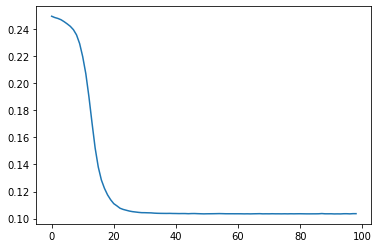

In [200]:
cnt=0
model = lstm_Model().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.1e-5)
criterion = nn.MSELoss().to(device)

loss_values = []
for filt, vel in dataset:
    cnt+=1
    if cnt>=100: break
    avg_cost = 0.0
    for it in range(0,settings.length):
        optimizer.zero_grad()
        frame = filt[it:it+settings.n_of_cnn_frames]
        if len(frame)< settings.n_of_cnn_frames:
            frame=np.append(frame, [np.zeros(128, dtype=bool)]*(settings.n_of_cnn_frames-len(frame)),axis=0)
        out = model(torch.Tensor(frame).view(1,1,settings.n_of_cnn_frames,-1).to(device))
        #print(out)
        loss = criterion(out, torch.Tensor(vel).view(1,128,-1).to(device))
        loss.backward()
        optimizer.step()
        print(cnt, ", ", it, " LOSS: ", loss.item())
        avg_cost += loss.item()/settings.length
    print('Data:{} cost={}'.format(cnt+1, avg_cost))
    loss_values.append(avg_cost)
plt.plot(loss_values)
        